# SVM - Support Vector Machine

#### Step 1: Imports

In [1]:
import numpy as np
import matplotlib as plt
import zipfile

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns #for plotting
import joblib

#### Step 2: Loading the Data

In [2]:
zipFile = 'npy_files.zip'
extractDir = './data'
#extract the data
with zipfile.ZipFile(zipFile, 'r') as zip_ref:
    zip_ref.extractall(extractDir)

X_train = np.load(f'{extractDir}/X_train_augmented.npy')
Y_train = np.load(f'{extractDir}/y_train_augmented.npy')
X_validation = np.load(f'{extractDir}/X_validation.npy')
Y_validation = np.load(f'{extractDir}/y_validation.npy')
X_test = np.load(f'{extractDir}/X_test.npy')
Y_test = np.load(f'{extractDir}/y_test.npy')

print('X_train shape:', X_train.shape)
print('y_train shape:', Y_train.shape)
print('X_validation shape:', X_validation.shape)
print('y_validation shape:', Y_validation.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (4756, 431, 13, 1)
y_train shape: (4756,)
X_validation shape: (297, 431, 13, 1)
y_validation shape: (297,)
X_test shape: (298, 431, 13, 1)
y_test shape: (298,)


#### Step 3: Normalizing Data

We need to flatten each sample (X_train, X_validation, and X_test) because SVM needs 2D array shapes, and does not work with multiple dimensions. Due to this, there is a risk of losing some information/nuanced features of the data, but it is needed for the model to work.

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_validation = X_validation.reshape(X_validation.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("Flattened X_train shape:", X_train.shape)
print("Flattened X_validation shape:", X_validation.shape)
print("Flattened X_test shape:", X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_validation)
X_test = scaler.fit_transform(X_test)

num_classes = len(np.unique(Y_train))
print('Number of classes: ', num_classes)

print('y_train shape:', Y_train.shape)
print('y_validation shape:', Y_validation.shape)
print('y_test shape:', Y_test.shape)

Flattened X_train shape: (4756, 5603)
Flattened X_validation shape: (297, 5603)
Flattened X_test shape: (298, 5603)
Number of classes:  10
y_train shape: (4756,)
y_validation shape: (297,)
y_test shape: (298,)


#### Step 4: Train the SVM Classifier

In [4]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, Y_train)

SVC(probability=True)

#### Step 5: Evaluating the SVM

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.61        40
           1       0.82      0.90      0.86        30
           2       0.65      0.61      0.62        33
           3       0.48      0.65      0.56        23
           4       0.69      0.60      0.64        30
           5       0.73      0.70      0.72        27
           6       0.65      0.89      0.75        27
           7       0.79      0.79      0.79        33
           8       0.54      0.50      0.52        28
           9       0.50      0.42      0.46        26

    accuracy                           0.66       297
   macro avg       0.65      0.66      0.65       297
weighted avg       0.66      0.66      0.66       297

Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       456
           1       0.95      0.99      0.97       458
          

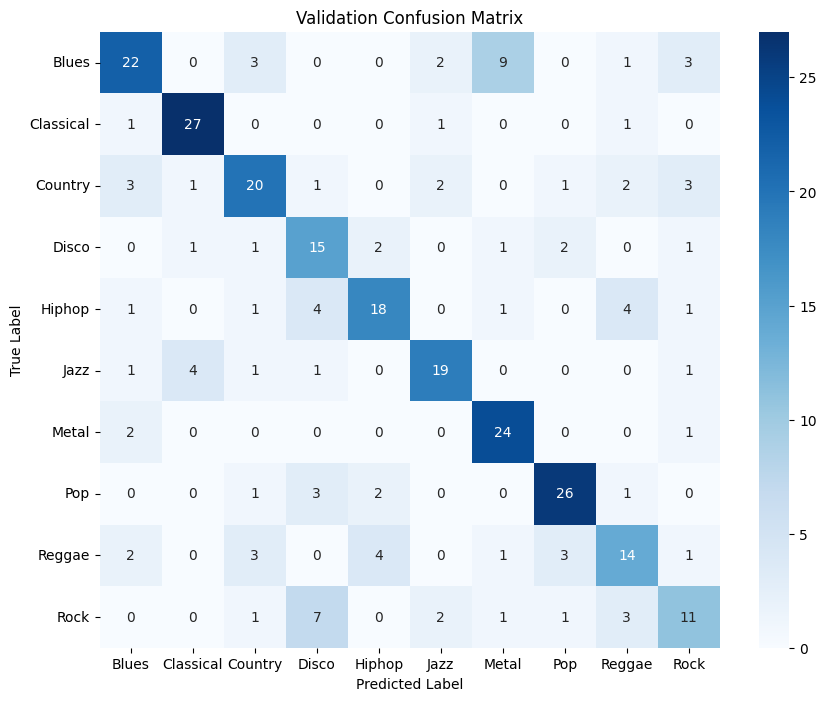

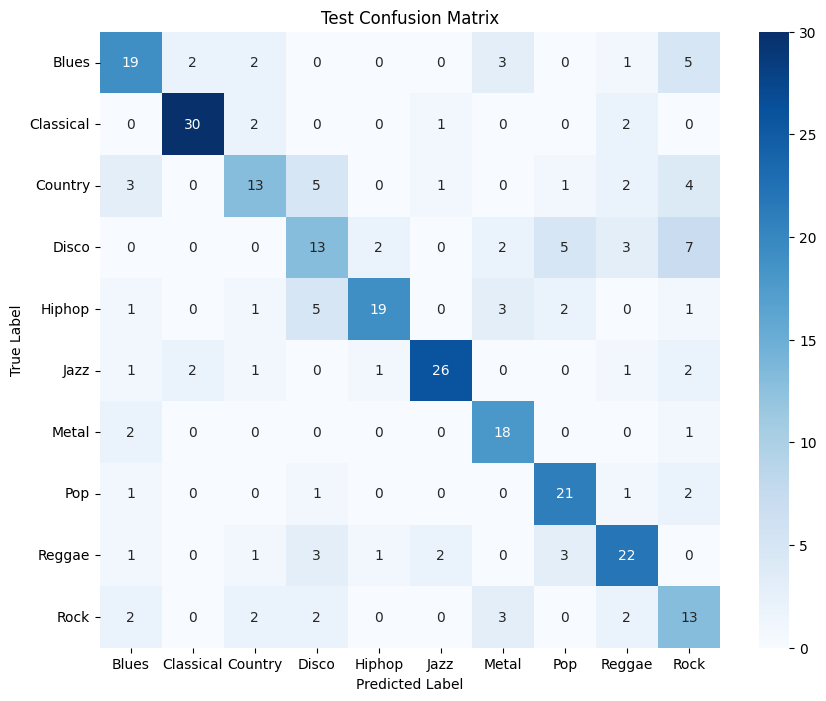

In [5]:
import matplotlib.pyplot as plt

#calssification report
Y_val_pred = svm_model.predict(X_validation)
print("Validation Classification Report:\n", classification_report(Y_validation, Y_val_pred))

Y_train_pred = svm_model.predict(X_train)
print("Training Classification Report:\n", classification_report(Y_train, Y_train_pred))

Y_test_pred = svm_model.predict(X_test)
print("Test Classification Report:\n", classification_report(Y_test, Y_test_pred))

#confusion matrix for the VALIDATION
conf_mat = confusion_matrix(Y_validation, Y_val_pred)

labels = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks, labels)
plt.yticks(ticks, labels, rotation = 0)
plt.show()

#confusion matrix for the TEST
conf_mat = confusion_matrix(Y_test, Y_test_pred)

labels = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks, labels)
plt.yticks(ticks, labels, rotation = 0)
plt.show()

#### Accuracy Evaluation

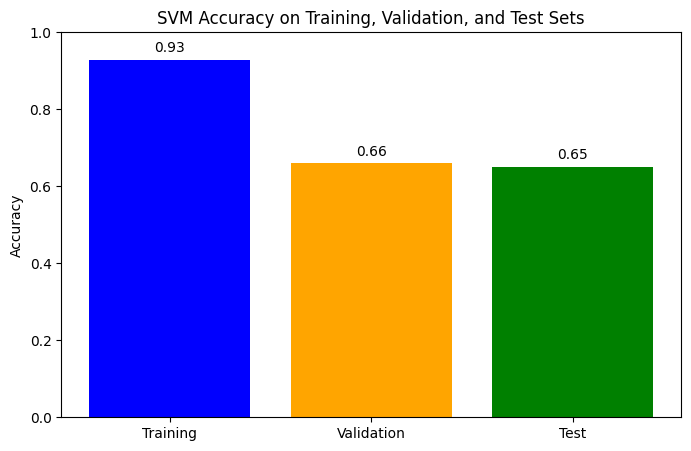

In [6]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(Y_train, Y_train_pred)
validation_accuracy = accuracy_score(Y_validation, Y_val_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

plt.figure(figsize=(8, 5))
datasets = ['Training', 'Validation', 'Test']
accuracies = [train_accuracy, validation_accuracy, test_accuracy]
plt.bar(datasets, accuracies, color=['blue', 'orange', 'green'])

plt.title('SVM Accuracy on Training, Validation, and Test Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')

plt.show()

#### Loss Evaluation

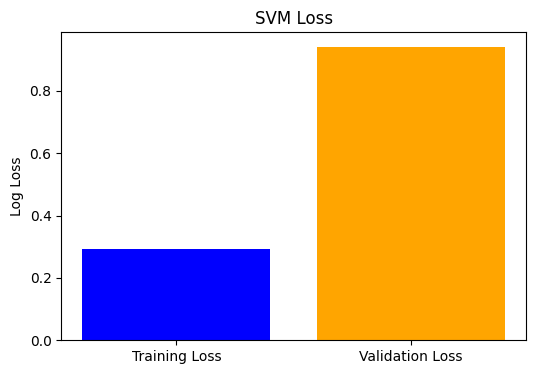

In [7]:
from sklearn.metrics import log_loss

trainingLoss = log_loss(Y_train, svm_model.predict_proba(X_train), labels=np.unique(Y_train))
valLoss = log_loss(Y_validation, svm_model.predict_proba(X_validation), labels=np.unique(Y_validation))

plt.figure(figsize=(6, 4))
plt.bar(['Training Loss', 'Validation Loss'], [trainingLoss, valLoss], color=['blue', 'orange'])
plt.title('SVM Loss')
plt.ylabel('Log Loss')
plt.show()

#### Step 6: Save the SVM

In [8]:
joblib.dump(svm_model, 'svm_music_genre_classifier.pkl')
print("SVM model saved as 'svm_music_genre_classifier.pkl'")

SVM model saved as 'svm_music_genre_classifier.pkl'
